In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup
url = "https://www.ourglocal.com/?start=40&limit=20"
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')
type(soup)    

bs4.BeautifulSoup

In [2]:
rows = soup.find_all('tr')
for row in rows:
    row_td = row.find_all('td')
    print(row_td)

[]
[<td align="left">1.<a href="/event/?eventid=65161" target="_blank">2020 3rd International Conference on Metal Material Processes and Manufacturing (ICMMPM2020)</a></td>, <td><font color="green">2020-05-21</font></td>, <td>2020-06-22</td>, <td><a href="/?c=15%2Csg">Singapore</a></td>]
[<td align="left">2.<a href="/event/?eventid=65546" target="_blank">6th International Conference on Computer Science, Information Technology and Applications (CSITA 2020)</a></td>, <td><font color="green">2020-04-26</font></td>, <td>2020-06-20</td>, <td><a href="/?c=15%2Cae">United Arab Emirates</a></td>]
[<td align="left">3.<a href="/event/?eventid=67217" target="_blank">2nd International Conference on Robotics and Intelligent Control (ICRIC 2020)</a></td>, <td><font color="green">2020-07-05</font></td>, <td>2020-11-20</td>, <td><a href="/?c=15%2Chk">Hong Kong</a></td>]
[<td align="left">4.<a href="/event/?eventid=64245" target="_blank">12th International Conference on Wireless &amp; Mobile Network (W

In [3]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
df = pd.DataFrame(list_rows)
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4
0,[],None,None,None,None
1,[1.2020 3rd International Conference on Metal ...,2020-05-21,2020-06-22,Singapore],None
2,[2.6th International Conference on Computer Sc...,Information Technology and Applications (CSIT...,2020-04-26,2020-06-20,United Arab Emirates]
3,[3.2nd International Conference on Robotics an...,2020-07-05,2020-11-20,Hong Kong],None
4,[4.12th International Conference on Wireless &...,2020-04-18,2020-05-30,Canada],None
5,[5.6th International Conference of Advances in...,2020-04-18,2020-06-27,Denmark],None
6,[6.6th International Conference on Bioscience ...,2020-04-18,2020-06-27,Denmark],None
7,[7.9th International Conference on Digital Ima...,2020-04-18,2020-05-30,Canada],None
8,[8.9th International Conference on Information...,2020-04-18,2020-05-30,Canada],None
9,[9.9th International Conference on Cryptograph...,2020-04-18,2020-05-30,Canada],None


In [4]:
df1[0] = df1[0].str.strip('[')
df1[3] = df1[3].str.strip(']')
last_row = len(df1)
df1 = df1.drop(df1.index[last_row-1]) 
df1=df1.drop(df1.index[0])
df1.head(last_row)

,0,1,2,3,4
1,1.2020 3rd International Conference on Metal M...,2020-05-21,2020-06-22,Singapore,None
2,2.6th International Conference on Computer Sci...,Information Technology and Applications (CSIT...,2020-04-26,2020-06-20,United Arab Emirates]
3,3.2nd International Conference on Robotics and...,2020-07-05,2020-11-20,Hong Kong,None
4,4.12th International Conference on Wireless &a...,2020-04-18,2020-05-30,Canada,None
5,5.6th International Conference of Advances in ...,2020-04-18,2020-06-27,Denmark,None
6,6.6th International Conference on Bioscience &...,2020-04-18,2020-06-27,Denmark,None
7,7.9th International Conference on Digital Imag...,2020-04-18,2020-05-30,Canada,None
8,8.9th International Conference on Information ...,2020-04-18,2020-05-30,Canada,None
9,9.9th International Conference on Cryptography...,2020-04-18,2020-05-30,Canada,None
10,10.An Employer’s Guide to Navigating Through t...,2020-05-13,2020-05-13,U.S.A,None


In [5]:
date = df1[2].to_list()
print(date)

[' 2020-06-22', ' 2020-04-26', ' 2020-11-20', ' 2020-05-30', ' 2020-06-27', ' 2020-06-27', ' 2020-05-30', ' 2020-05-30', ' 2020-05-30', ' 2020-05-13', ' 2020-12-12', ' 2020-12-12', ' 2020-06-27', ' 2020-12-12', ' 2020-06-13', ' 2020-06-13', ' 2020-04-18', ' 2020-04-18', ' 2020-12-12', ' 2020-04-18']


In [6]:
s = pd.to_datetime(pd.Series(date), format='%Y %m %d',errors="coerce")
s.index = s.dt.to_period('m')
s = s.groupby(level=0).size()

s = s.reindex(pd.period_range(s.index.min(), s.index.max(), freq='m'), fill_value=0)

2020-04    4
2020-05    5
2020-06    6
2020-07    0
2020-08    0
2020-09    0
2020-10    0
2020-11    1
2020-12    4
Freq: M, dtype: int64


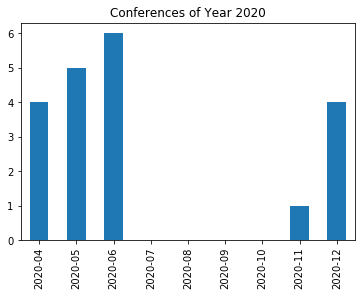

In [7]:
print(s)
s.plot.bar(title='Conferences of Year 2020')